### ARRANCAMOS CON LA ST SIMPLIFICADa

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

/tmp/ipykernel_2678/2050007954.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')


In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


### White Noise
Vamos a ver como se compara el ruido blanco (wn) con una Serie Temporal (la de valores)

RANDOM.NORMAL crea una matriz de valores aletorios de distribucion normal
Para que sea comparable a la ST anterior le pasamos la media el std y la longitud ... 
location (loc) = media - parametro de localizacion
scale = escala , desviacion estandar, std


In [6]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [7]:
wn

array([1008.10792945, 1185.79310334,  884.46176857, ..., 1326.3665044 ,
       1238.4374067 , 1481.00207516])

In [8]:
df['wn'] = wn

/tmp/ipykernel_2678/672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [9]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1084.743995
std,292.559287,293.037116
min,438.920000,-135.516732
25%,914.620000,885.049926
50%,1144.650000,1079.705880
75%,1316.280729,1280.258660
max,1570.252238,2327.293251


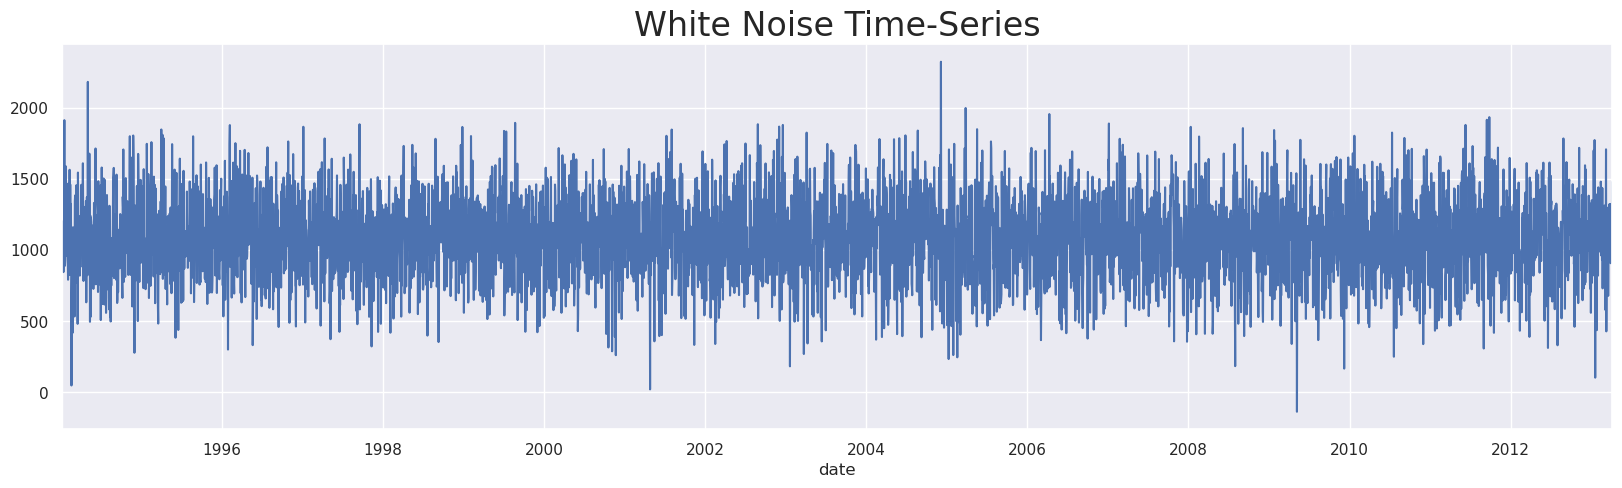

In [10]:
# sale como indice ya las fechas 
# vemos el comportamiento aleatorio sin patron alrededor de la media
# no se puede predecir valores nuevos

df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

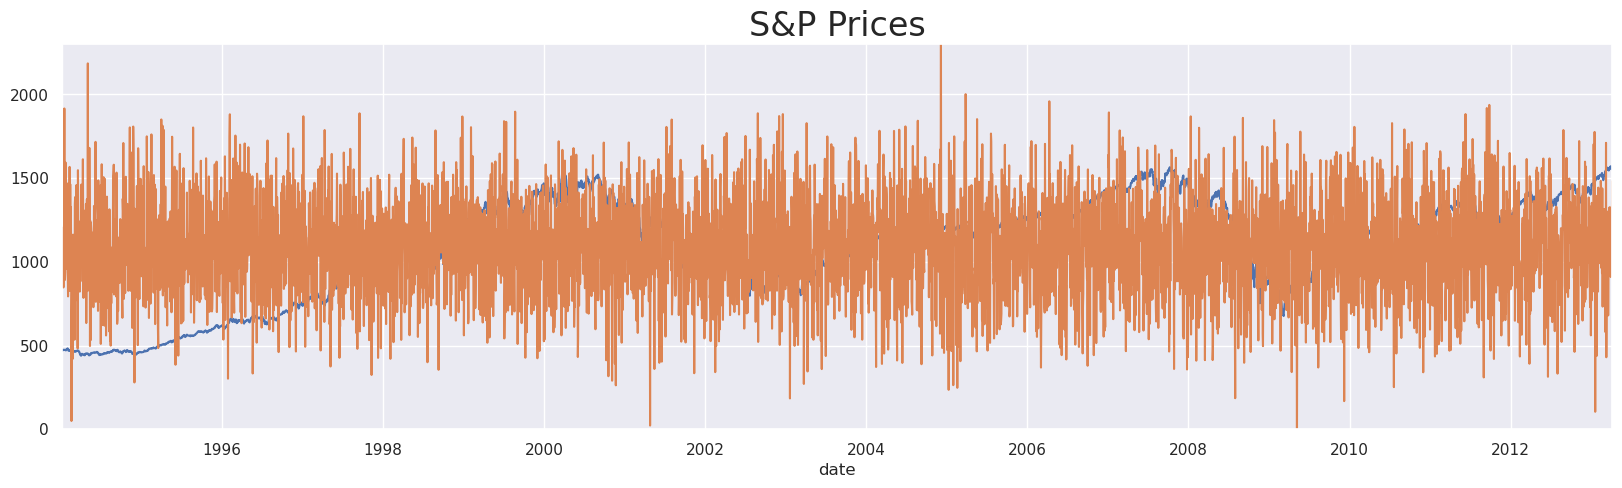

In [11]:
df.market_value.plot(figsize=(20,5))
df.wn.plot(figsize = (20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [12]:
rw = pd.read_csv("RandWalk.csv")


In [13]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [14]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)
#hacemos la transformacion a tipo fecha y que sea el indice ... como en la clase anterior

In [15]:
rw.set_index("date", inplace = True)


In [16]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [17]:
rw = rw.asfreq('b')
# frecuencia se pone solo a dias laborales (business days)

In [18]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [19]:
df['rw'] = rw.price

/tmp/ipykernel_2678/818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [20]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1008.107929,1122.139662
1994-01-10,475.27,1185.793103,1080.347860
1994-01-11,474.13,884.461769,1082.095245
1994-01-12,474.17,1205.565456,1083.639265
1994-01-13,472.47,847.122314,1067.146255


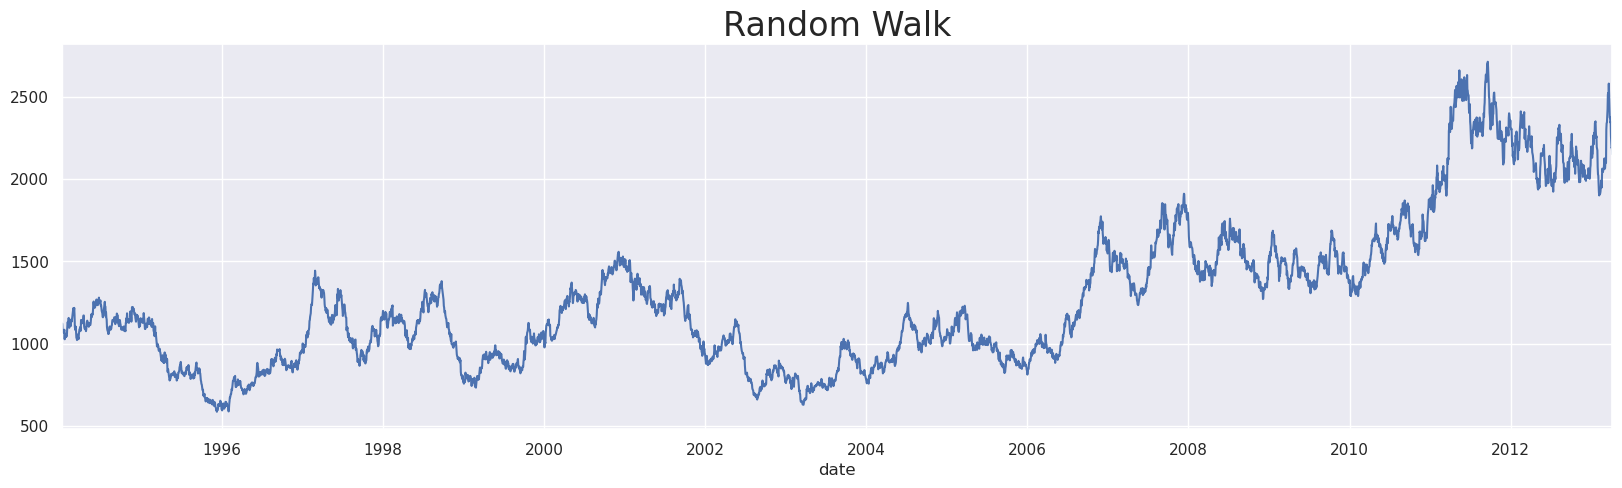

In [21]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

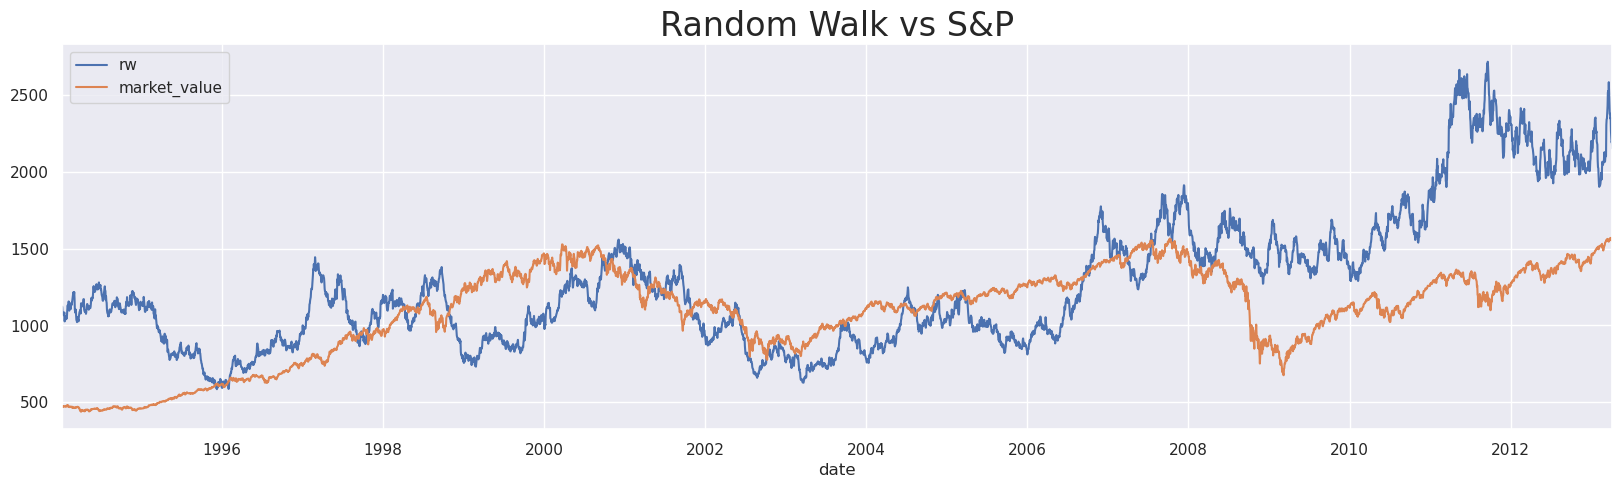

In [22]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### ESTACIONARIEDAD

In [23]:
sts.adfuller(df.market_value) #SP500

#stattools 
# import statsmodels.tsa.stattools as sts 
# aplica el metodo de contaste de hipotesis a la serite temporal
# VALOR DEL test ESTADISTIcO - valor estadistico calculado por el test
# SEGUNDO: P VALOR: 0.41 - SE COMPARA CON 0.01, 0.1, 0.05 - NO SE PUEDE RECHAZAR H0 - SIGUE SIENDO no ESTACIONARIA
# TERCERO: NUMERO DE RETRASOS PARA EL ESTADISTICO. LA CORRELACION 
# CUARTO
# 1%, 10%, 5% SON LOS VALORES CRITICOS CON LOS QUE COMPARAR EL ESTADISTICO - ES EL NIVEL DE SIGNIFICACION, PARA DIFERENTES NIVELES DE CONFIANZA
# TODOS SON MENORES - NO SE RECHAZA LA HIPOTESIS NULA
# SERIE NO ESTACIONARIA
#

(-1.7369847452352463,
 0.4121645696770607,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [24]:
sts.adfuller(df.wn)

# EL RUIDO BLANCO ES ESTACIONARIO.
#p- valor es 0.0, se rechaza la hipotesis al 1% (99% de confianza)
# el estadistico es -72 que es menor que el 1% - se rechaza H0
# serie estacionaria
# 0 no hay retrasos

(-70.66807690389217,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70818.80551719006)

In [ ]:
sts.adfuller(df.rw)



### Seasonality / ESTACIONALIDAD

In [ ]:
#pasajeros de avion

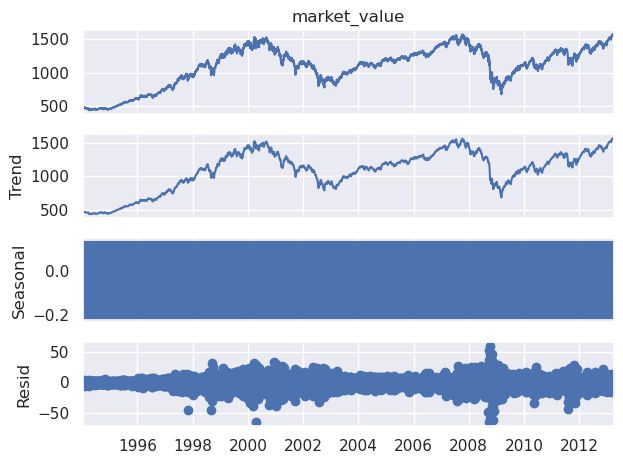

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

# PRIMER GRAFICO: SERIE ORIGINAL
# SEGUNDO GRAFICO: TENDENCIA /TREND. LA TENDENCIA SE PARECE A LA SERIE PORQUE SE BASA EN USAR EL ELEMENTO ANTERIOR. 
# EXPLICA LA MAYOR PARTE DE LA VARIABILIAD DE LOS DATOS

# TERCERO: SEASONAL /ESTACIONALIDAD. VALORES OSCIALNDO (AUNQUE PARECE UN RECTANGULO) - NO HAY UNPATRON CICLICO CONCRETO - SO HAY ESTACIONALIAD

# RESIDUOS: ERRORES DE LAS ESTIMACIONES DEL MODELO.VARIAN MAS ALREDEDOR DE 2008 Y 2000 POR LASBURBUJAS - LOS ERRORES SON MAYOR
# EN ESAS FECHAS
# ESTOS RESULTADOS QUE NO HAY ESTACIONALIAD EN LOS DATOS

In [27]:
s_dec_additive

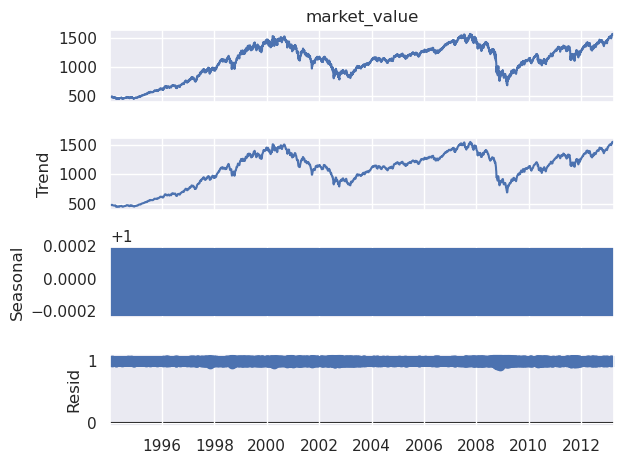

In [28]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()
#PARA ESTAR SEGUROS LO HACEMOS TAMBIEN CON LA DESCOMPOSICION MULTIPLICATIVA
# LOS RESULTADOS SON LOS MISMOS

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.wn, model = "aditive")
s_dec_multiplicative.plot()
plt.show()

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.rw)
s_dec_multiplicative.plot()
plt.show()

In [ ]:
#pasajeros de avion
#pasajeros de avion

### ACF

In [ ]:
# los lags son los retrasos maximos que se van a considerar - sino calcula la longitud de toda la serie
# 40 es un estandar
# zero: indica si se incluye el valor actual en los calculos, seria entre x(t) y x(t) siempre sera uno - en general se ignora


import statsmodels.graphics.tsaplots as sgt 
import matplotlib.pyplot as plt 



sgt.plot_acf(df.market_value, lags = 40)
plt.title("ACF S&P", size = 24)
plt.show()

# Eje X retrasos, eje y valores de coeficiente de autocorrelacion (de -1 a 1)
# aqui todos son positivos, todos tienen correlacion positiva
# la primera line a es la autocorrelacion entre x(t) y x(t-1), la segunda con x(t-2)
# los periodos son dias 

# el area azul representa la significacion de los valores de autocorrelacion, miden si son significativamente disitntos de 0
#este area se expanda al incrementar t, a mayor distancia en el tiempo mas improbable es que la correlacion exista
# los precios de hoy estaran mas relacionados con los de ayer que con los de hace un mes
# en general si la barra sale de la franja azul es significativo

# la autocorrelacion apenas disminuye - esto sugiere que los precios incluso un mes atras, 
# auun pueden servir como estimaciones del precio de hoy

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

# valor de autocorrelacion de ruido blanco
# los valores indican que no hay autocorrelacion, cambian positivos a negativo y son valores minimos y ademas
#las lineas caen dentro de la region azul, con lo que los coeficientes no son significativos - 
# No hay autocorrelacion para ningun retraso, por definicion del ruido blanco
# si se sale de la caja azul es algo aleatorio


In [ ]:
sgt.plot_acf(df.wn, lags = 40)
plt.title("ACF WN", size = 24)
plt.show()

In [ ]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

# la camina aleatoria es como los precios del SP al ser una ST parecida


# ver lineas aereas acf

### PACF

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = 'ols') # aquie se le pasa el metodo para determinar la correlacion parcial
#aqui se usa Ordinary Least Squares

plt.title("PACF S&P", size = 24)
plt.show()

# EL area en azul es el area de significacion.SOlo los primeros elementos son significativamente disintos de 0
# los hay negativos tambien 
# este metodo cancela los canales adicionales - no considera los efectos intermedio o indirectos como afectan al dia presente
#el primer valor de PACF y ACF son identicos porque no hay canales adicionales para el primer caso
# es decir no hay nada en el medio

# a partir del tercer retraso ya no son significativos


In [ ]:
sgt.plot_pacf(df.wn, lags = 40,  zero = False,  method = 'ols')
plt.title("PACF WN", size = 24)
plt.show()

# con ruido blanco no hay autocorrelacion- por lo tanto tampoco PACF 
#todos los coeficiones son no significativos - no hay autocorrelacion en el ruido blanco

In [ ]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = 'ols')
plt.title("PACF RW", size = 24)
plt.show()

#la caminata aleatoria se parece mas a los precios ...